# Churn Customer Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
data=pd.read_csv("E-Commerce-Dataset.csv")

In [7]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [9]:
data.shape

(5630, 20)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [11]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [12]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

As we can see the following columns has missing values:  
* Tenure<br>
* WarehouseToHome<br>
* HourSpendOnApp <br>
* OrderAmountHikeFromlastYear<br>
* CouponUsed<br>
* OrderCount<br>
* DaySinceLastOrder

### Distribution of dependent variable , Churn 

In [13]:
(data[data["Churn"]==1].shape[0]/data.shape[0])*100

16.838365896980463

only 17% of the data is showing churn

In [14]:
churn = data["Churn"].value_counts().reset_index()
churn.head()

,index,Churn
0,0,4682
1,1,948


<AxesSubplot:xlabel='index', ylabel='Churn'>

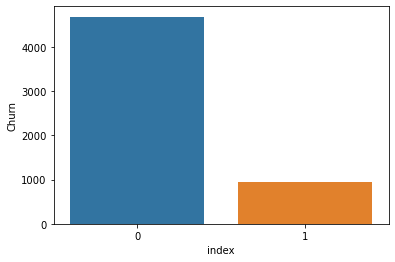

In [16]:
sns.barplot(x=churn["index"],y=churn['Churn'])

**we can see this is a highly imblanced dataset**

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

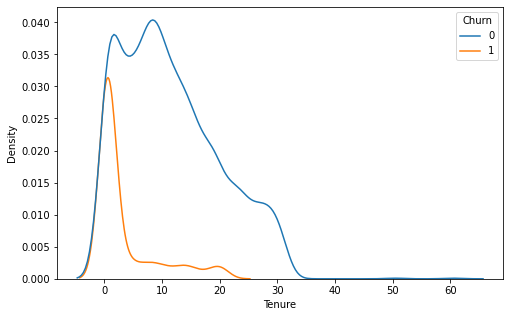

In [17]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=data['Tenure'],hue=data["Churn"])

**the above graph shows the relationship between tenure and churning . The lesser the tenure , more are the chances to churn . So , one of the ways to reduce customer churning would be to retain the customers for longer tenure , so it reduces the chances of churning**

In [18]:
churning=data[data['Churn']==1]

In [19]:
churning.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [21]:
data['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

**As we can see , Prefered Order Category column has repetitive values , Mobile and Mobile Phone are same entities**

In [22]:
data['PreferedOrderCat'].replace({'Mobile Phone':'Mobile'} , inplace=True)

In [23]:
data['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Others', 'Fashion', 'Grocery'],
      dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Laptop & Accessory'),
  Text(1, 0, 'Mobile'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Fashion'),
  Text(4, 0, 'Grocery')])

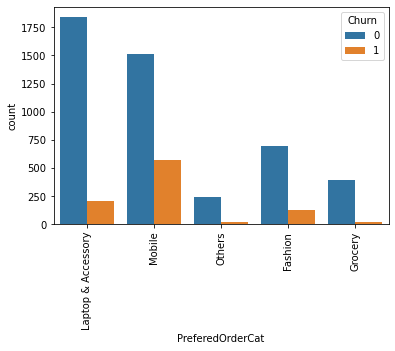

In [25]:
ax=sns.countplot(x=data['PreferedOrderCat'],hue=data['Churn'])
plt.xticks(rotation=90)

**As we see above ,the Customers who churn mostly prefer phones , This means that there is some issue with mobile phones .
either the quality is not good or the services are not good**

In [26]:
(churning[churning['Gender'] == 'Male'].shape[0] / data[data['Gender'] == 'Male'].shape[0]) * 100

17.73049645390071

In [27]:
(churning[churning['Gender'] == 'Female'].shape[0] / data[data['Gender'] == 'Female'].shape[0]) * 100

15.49421193232413

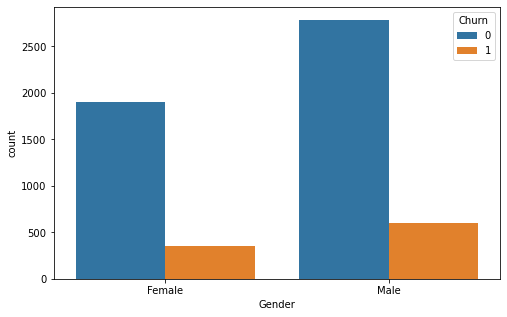

In [28]:
plt.figure(figsize=(8,5))
g=sns.countplot(x=data['Gender'],hue=data['Churn'])

**as we see Male Customers are more likely to churn . On an average almost 18% Male Customers churn**

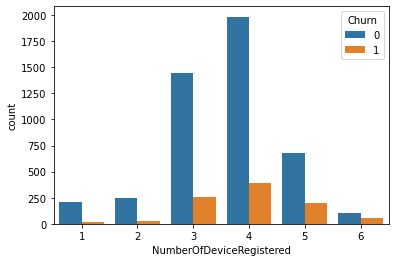

In [30]:
dev=sns.countplot(x=data["NumberOfDeviceRegistered"] , hue=data['Churn'])

**Customers with more number of registered devices are more likely to churn .May be they are facing some issues with multiple devices or interface doesn't work well on different devices**

In [34]:
status=churning['MaritalStatus'].value_counts().reset_index()

In [35]:
status

,index,MaritalStatus
0,Single,480
1,Married,344
2,Divorced,124


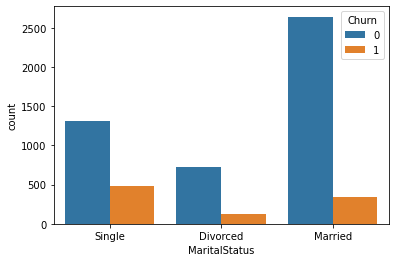

In [36]:
status=sns.countplot(x=data['MaritalStatus'], hue=data['Churn'])

**the customers who are single are more likely to churn**

In [37]:
data['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

We can see that this column has many redundanr values, like **CC** and **Credit Card** means the same thing and **COD** and **Cash on Delivery** are same 

In [42]:
data['PreferredPaymentMode'].replace({'Credit Card':'CC','Cash on Delivery':'COD'},inplace=True)

In [43]:
data['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'COD', 'E wallet'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Debit Card'),
  Text(1, 0, 'UPI'),
  Text(2, 0, 'CC'),
  Text(3, 0, 'COD'),
  Text(4, 0, 'E wallet')])

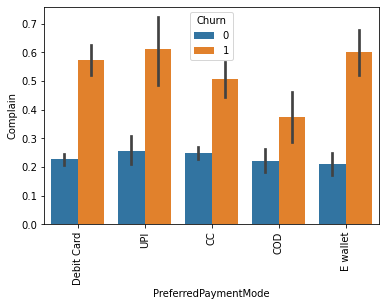

In [46]:
payment=sns.barplot(x=data['PreferredPaymentMode'],y=data['Complain'],hue=data['Churn'])
plt.xticks(rotation=90)

In [47]:
order = data['PreferedOrderCat'].value_counts().reset_index()

<AxesSubplot:xlabel='PreferedOrderCat', ylabel='index'>

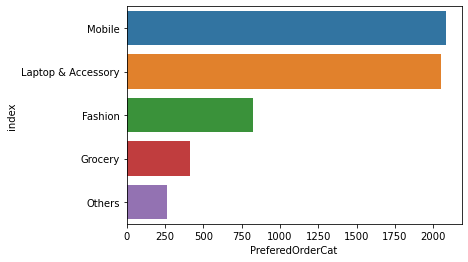

In [48]:
sns.barplot(x = order['PreferedOrderCat'], y = order['index'])

**From the above the graph, we can see that the preferred category is Laptop and Accessory.**

<AxesSubplot:xlabel='SatisfactionScore', ylabel='CashbackAmount'>

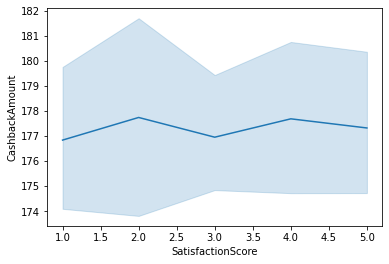

In [49]:
sns.lineplot(x = data['SatisfactionScore'], y = data['CashbackAmount'])

**from this graph, we can understand that cashback amount is not directly related to satisfaction score.**

<AxesSubplot:xlabel='Gender', ylabel='HourSpendOnApp'>

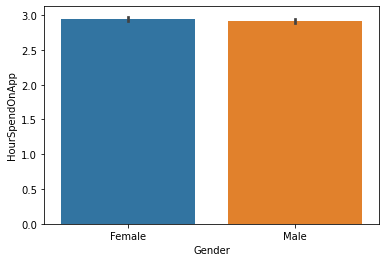

In [50]:
sns.barplot(x = data['Gender'], y = data['HourSpendOnApp'])

nearly both men and women use the app for the same time, so no gender bias

In [51]:
payment_mode = data['PreferredPaymentMode'].value_counts().reset_index()

<AxesSubplot:xlabel='PreferredPaymentMode', ylabel='index'>

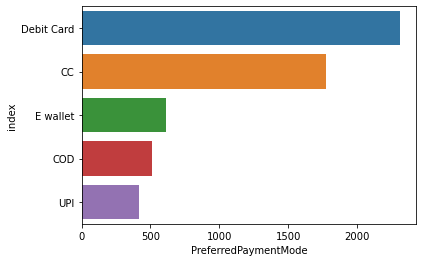

In [52]:
sns.barplot(x = payment_mode['PreferredPaymentMode'], y = payment_mode['index'])

people prefer to pay using debit card

<AxesSubplot:xlabel='Complain', ylabel='SatisfactionScore'>

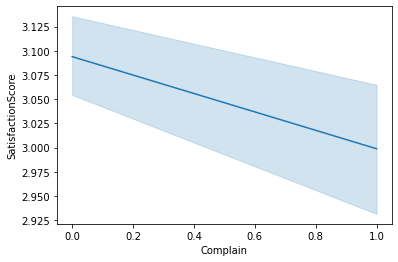

In [53]:
sns.lineplot(x = data['Complain'], y = data['SatisfactionScore'])

**When complaints are less, then the satisfaction score is more. This means customers with more complaints have less satisfaction score and the organisation need to resolve the issues of these customers to increase the
satisfaction score.**

<AxesSubplot:xlabel='WarehouseToHome', ylabel='SatisfactionScore'>

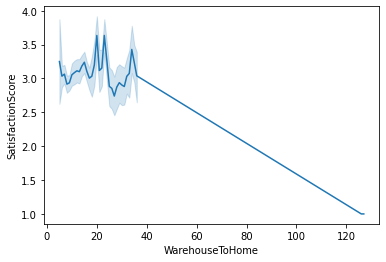

In [54]:
sns.lineplot(x = data['WarehouseToHome'], y = data['SatisfactionScore'])

**as the distance increases the satisfaction score reduces, this means that we can setup warehouses such that it is closer to maximum number of customers. Or group the customers and then set up new warehosues on the basis of satisfaction score.**

<AxesSubplot:xlabel='WarehouseToHome', ylabel='Complain'>

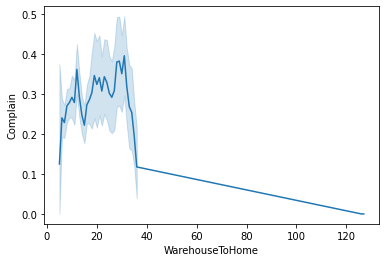

In [55]:
sns.lineplot(x = data['WarehouseToHome'], y = data['Complain'])

<AxesSubplot:xlabel='OrderAmountHikeFromlastYear', ylabel='Count'>

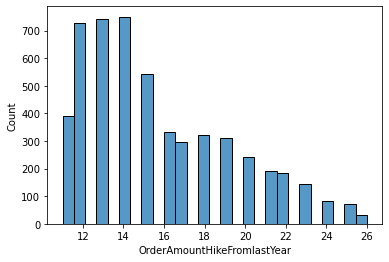

In [56]:
sns.histplot(x = data['OrderAmountHikeFromlastYear'])

**From the graph, we can understand that the maximum hike last year was around 12-14%.**

In [57]:
data['OrderAmountHikeFromlastYear'].value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

<AxesSubplot:xlabel='OrderAmountHikeFromlastYear', ylabel='Count'>

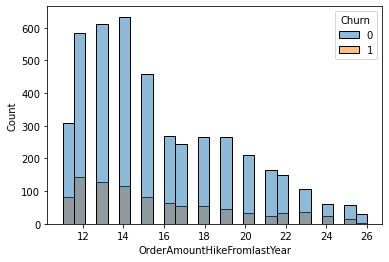

In [58]:
sns.histplot(x = data['OrderAmountHikeFromlastYear'], hue = data['Churn'])

In [59]:
data['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [60]:
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

In [61]:
data['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

In [62]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

<AxesSubplot:xlabel='PreferredLoginDevice', ylabel='count'>

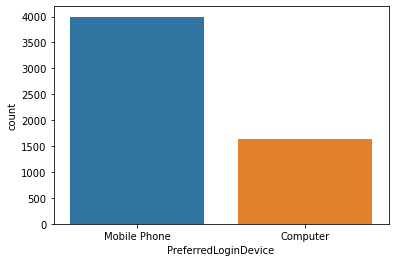

In [63]:
sns.countplot(x = data['PreferredLoginDevice'])

**From the above graph, we can understand that most of the customers are mobile phone users.**

In [64]:
data['CouponUsed']

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
5625    1.0
5626    1.0
5627    1.0
5628    2.0
5629    2.0
Name: CouponUsed, Length: 5630, dtype: float64

In [65]:
data['CouponUsed'].value_counts()

1.0     2105
2.0     1283
0.0     1030
3.0      327
4.0      197
5.0      129
6.0      108
7.0       89
8.0       42
10.0      14
9.0       13
11.0      12
12.0       9
13.0       8
14.0       5
16.0       2
15.0       1
Name: CouponUsed, dtype: int64

<AxesSubplot:xlabel='CouponUsed', ylabel='Count'>

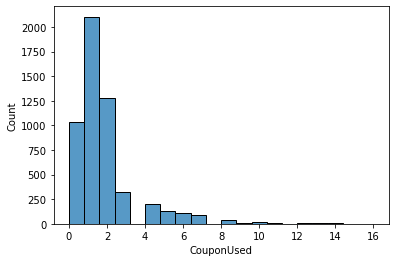

In [66]:
sns.histplot(x = data['CouponUsed'], bins = 20)

**Mostly customers preferred 1-2 coupons in the last month. Very few customers preferred more than 5 coupons.**

<AxesSubplot:xlabel='CouponUsed', ylabel='Count'>

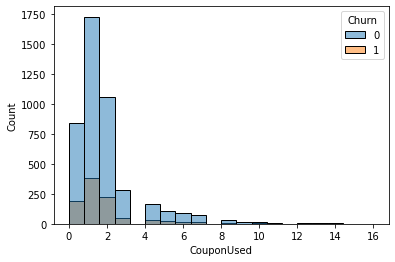

In [67]:
sns.histplot(x = data['CouponUsed'], hue = data['Churn'], bins = 20)

**People with less coupons are more likely to churn. Customers who applied more than 5 coupons, have retained. This can be because they got some extra benefits using those coupons.**

In [68]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [69]:
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [90]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [72]:
data['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In [73]:
data['WarehouseToHome'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

In [74]:
data['HourSpendOnApp'].unique()

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

In [75]:
data['NumberOfDeviceRegistered'].unique()

array([3, 4, 5, 2, 1, 6], dtype=int64)

In [76]:
data['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Others', 'Fashion', 'Grocery'],
      dtype=object)

In [77]:
data['Complain'].unique()

array([1, 0], dtype=int64)

In [78]:
data['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

In [79]:
data['OrderCount'].unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

In [80]:
data['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

**as we can see there are many columns with missing values**

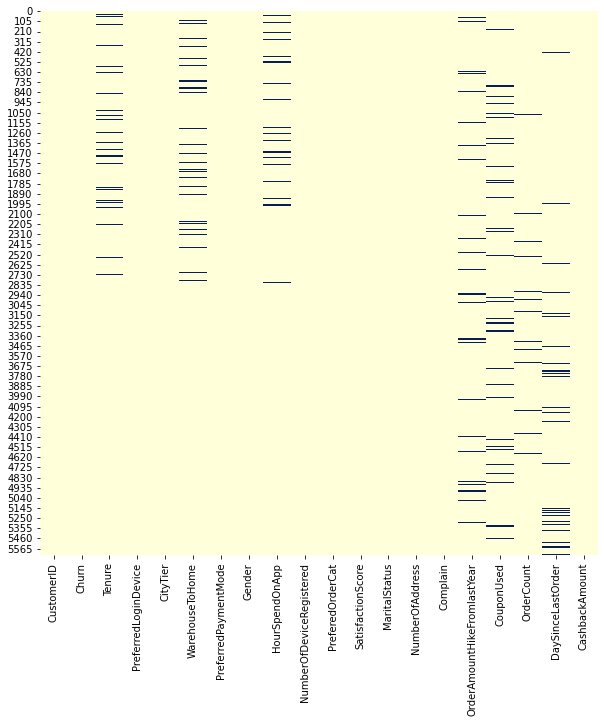

In [81]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.isnull(), cbar = False, cmap = "YlGnBu")
plt.show()

**We used this heatmap to see, if the missing values shared same row or all are from different rows. As we can see the missing are non-uniformly distributed throughout the dataset. So dropping the rows can't be option. That will lead to huge data loss. One of the ways to handle or deal with these missing values is KNNImputer.**

In [82]:
from sklearn.impute import KNNImputer

In [83]:
imputer=KNNImputer(n_neighbors=5)

In [84]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])
one_hot_encoded_data.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,1,0,0,0,1,0,0,0,0,1
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,...,0,1,0,0,0,1,0,0,0,1
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,...,0,1,0,0,0,1,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,1,0,0,1,0,0,0,0,1
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,...,0,1,0,0,0,1,0,0,0,1


In [85]:
new_data = imputer.fit_transform(one_hot_encoded_data)

In [87]:
new_data

array([[5.0001e+04, 1.0000e+00, 4.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.0002e+04, 1.0000e+00, 2.6000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.0003e+04, 1.0000e+00, 2.6000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [5.5628e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [5.5629e+04, 0.0000e+00, 2.3000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [5.5630e+04, 0.0000e+00, 8.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [88]:
one_hot_encoded_data[:]= imputer.transform(new_data)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


In [89]:
one_hot_encoded_data.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,50002.0,1.0,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,50003.0,1.0,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,50004.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,50005.0,1.0,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [91]:
one_hot_encoded_data.isnull().sum()

CustomerID                             0
Churn                                  0
Tenure                                 0
CityTier                               0
WarehouseToHome                        0
HourSpendOnApp                         0
NumberOfDeviceRegistered               0
SatisfactionScore                      0
NumberOfAddress                        0
Complain                               0
OrderAmountHikeFromlastYear            0
CouponUsed                             0
OrderCount                             0
DaySinceLastOrder                      0
CashbackAmount                         0
PreferredLoginDevice_Computer          0
PreferredLoginDevice_Mobile Phone      0
PreferredPaymentMode_CC                0
PreferredPaymentMode_COD               0
PreferredPaymentMode_Debit Card        0
PreferredPaymentMode_E wallet          0
PreferredPaymentMode_UPI               0
Gender_Female                          0
Gender_Male                            0
PreferedOrderCat

In [104]:
one_hot_encoded_data.to_csv('E_Commerce_Churn_cleaned.csv', index = False)

In [111]:
cleaned_data=pd.read_csv("E_Commerce_Churn_cleaned.csv")

In [112]:
cleaned_data.drop(columns = ['CustomerID'], inplace = True)

In [113]:
cleaned_data.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**Dividing the dataset and seperating the target column  from it**

In [120]:
X = cleaned_data.drop(['Churn'] , axis=1)

In [121]:
X.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,11.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [122]:
X.shape

(5630, 30)

In [125]:
Y=cleaned_data['Churn']

In [127]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Churn, dtype: float64

### Dividing the dataset into training and testing dataset.


In [123]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

## Model Training

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Logistic Regression**

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
print('Accuracy Score : ', accuracy_score(y_test, y_pred1) * 100)
print('Confusion_Matrix : \n', confusion_matrix(y_test, y_pred1))
print('Classification Report : \n', classification_report(y_test, y_pred1))

Accuracy Score :  88.1586737714624
Confusion_Matrix : 
 [[1331   50]
 [ 150  158]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1381
         1.0       0.76      0.51      0.61       308

    accuracy                           0.88      1689
   macro avg       0.83      0.74      0.77      1689
weighted avg       0.87      0.88      0.87      1689



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest**

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
clf=RandomForestClassifier(random_state=10)
clf.fit(x_train,y_train)
y_pred2=clf.predict(x_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred2) * 100)
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred2))
print('Classification Report : \n', classification_report(y_test, y_pred2))

Accuracy score :  96.03315571343991
Confusion Matrix : 
 [[1367   14]
 [  53  255]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1381
         1.0       0.95      0.83      0.88       308

    accuracy                           0.96      1689
   macro avg       0.96      0.91      0.93      1689
weighted avg       0.96      0.96      0.96      1689



**Decision Tree**

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,min_samples_leaf=5)
clf_gini.fit(x_train,y_train)
y_pred3=clf_gini.predict(x_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred3))
print('Classification Report: \n', classification_report(y_test, y_pred3))

Confusion Matrix: 
 [[1299   82]
 [  84  224]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1381
         1.0       0.73      0.73      0.73       308

    accuracy                           0.90      1689
   macro avg       0.84      0.83      0.83      1689
weighted avg       0.90      0.90      0.90      1689



**Adaboost**

In [138]:
from sklearn.ensemble import AdaBoostClassifier

In [139]:
ada_clf=AdaBoostClassifier(n_estimators = 100)
ada_clf.fit(x_train,y_train)
y_pred4=ada_clf.predict(x_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred4))
print('Classification Report: \n', classification_report(y_test, y_pred4))

Confusion Matrix: 
 [[1322   59]
 [ 123  185]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1381
         1.0       0.76      0.60      0.67       308

    accuracy                           0.89      1689
   macro avg       0.84      0.78      0.80      1689
weighted avg       0.89      0.89      0.89      1689



**Till now, we used different supervised machine learning algorithms like Logistic Regression, Decision Trees, Random Forest and AdaBoost. 
Out of all these algorithms, the performance of Random Forest has the best with an accuracy of 96% and F1-score of 0.87.**

Random Forest, without any imbalancing technique gave 96% accuracy, So I decided to give with that.

In [158]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)
print('accuracy ' ,accuracy_score(y_test, y_pred2) * 100)
print('confusion matrix \n', confusion_matrix(y_test, y_pred2))
print('classification report \n', classification_report(y_test, y_pred2))

accuracy  96.03315571343991
confusion matrix 
 [[1368   13]
 [  54  254]]
classification report 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1381
         1.0       0.95      0.82      0.88       308

    accuracy                           0.96      1689
   macro avg       0.96      0.91      0.93      1689
weighted avg       0.96      0.96      0.96      1689



Next, I tried to see which all features had a huge impact 

In [160]:
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

Tenure                                 0.210768
CashbackAmount                         0.086516
WarehouseToHome                        0.067984
Complain                               0.066237
NumberOfAddress                        0.064121
DaySinceLastOrder                      0.060163
OrderAmountHikeFromlastYear            0.054469
SatisfactionScore                      0.045519
NumberOfDeviceRegistered               0.033556
OrderCount                             0.031489
CouponUsed                             0.029193
PreferedOrderCat_Mobile                0.026387
CityTier                               0.022993
MaritalStatus_Single                   0.022880
HourSpendOnApp                         0.022072
PreferredPaymentMode_CC                0.014977
MaritalStatus_Married                  0.014669
PreferredPaymentMode_Debit Card        0.013725
PreferredLoginDevice_Computer          0.013640
PreferredLoginDevice_Mobile Phone      0.013209
Gender_Male                            0

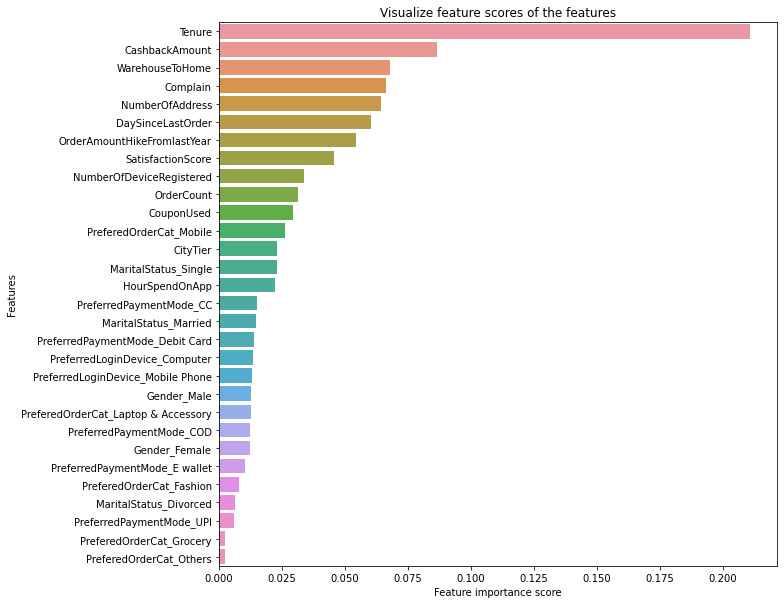

In [162]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [163]:
features = feature_scores.reset_index()
features

,index,0
0,Tenure,0.210768
1,CashbackAmount,0.086516
2,WarehouseToHome,0.067984
3,Complain,0.066237
4,NumberOfAddress,0.064121
5,DaySinceLastOrder,0.060163
6,OrderAmountHikeFromlastYear,0.054469
7,SatisfactionScore,0.045519
8,NumberOfDeviceRegistered,0.033556
9,OrderCount,0.031489


In [164]:
top20_features = features.iloc[:20, :]['index'].tolist()

In [165]:
top20_features

['Tenure',
 'CashbackAmount',
 'WarehouseToHome',
 'Complain',
 'NumberOfAddress',
 'DaySinceLastOrder',
 'OrderAmountHikeFromlastYear',
 'SatisfactionScore',
 'NumberOfDeviceRegistered',
 'OrderCount',
 'CouponUsed',
 'PreferedOrderCat_Mobile',
 'CityTier',
 'MaritalStatus_Single',
 'HourSpendOnApp',
 'PreferredPaymentMode_CC',
 'MaritalStatus_Married',
 'PreferredPaymentMode_Debit Card',
 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone']

In [166]:
X_selected = x_train[top20_features]

In [167]:
x_test_s = x_test[top20_features]

**Training the model with these Top20 features:**

In [168]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 10)
clf.fit(X_selected, y_train)
y_pred6 = clf.predict(x_test_s)
print('accuracy ' ,accuracy_score(y_test, y_pred6) * 100)
print('confusion matrix \n', confusion_matrix(y_test, y_pred6))
print('classification report \n', classification_report(y_test, y_pred6))

accuracy  95.44108940201302
confusion matrix 
 [[1369   12]
 [  65  243]]
classification report 
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1381
         1.0       0.95      0.79      0.86       308

    accuracy                           0.95      1689
   macro avg       0.95      0.89      0.92      1689
weighted avg       0.95      0.95      0.95      1689

